# Análisis Exploratorio de Datos (EDA) sobre el PIB por Industria

## Introducción

En este análisis realizaremos un **Análisis Exploratorio de Datos (EDA)** usando datos del Producto Interno Bruto (PIB) por industria, obtenidos de la API del **Bureau of Economic Analysis (BEA)**. Nuestro objetivo es:

1. Obtener los datos para los últimos 5 años.
2. Realizar una descripción estadística básica de los datos.
3. Limpiar los datos si es necesario.
4. Visualizar la distribución de los datos y la evolución de las industrias a lo largo del tiempo.
5. Extraer conclusiones a partir del análisis.

Este EDA se estructura en las siguientes secciones:
- Carga de los datos desde la API.
- Estadísticas descriptivas de los datos.
- Limpieza de los datos.
- Visualización de las principales características.
- Conclusiones finales basadas en el análisis.


In [56]:
import os
import psycopg2
import pandas as pd
from dotenv import load_dotenv

# Cargar las variables de entorno desde el archivo .env
load_dotenv()

# Obtener la configuración de la base de datos desde las variables de entorno
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_name = os.getenv('DB_NAME')

# Conectar a la base de datos PostgreSQL dentro de un bloque try-except-finally
try:
    conn = psycopg2.connect(
        host=db_host,
        port=db_port,
        user=db_user,
        password=db_password,
        dbname=db_name
    )
    cursor = conn.cursor()
    print("Conexión exitosa a la base de datos.")

    # Obtener los datos sucios de la tabla 'pib_sucio' usando un cursor de psycopg2
    query = 'SELECT * FROM pib_sucio;'
    cursor.execute(query)
    data = cursor.fetchall()

    # Obtener los nombres de las columnas de la tabla 'pib_sucio'
    col_names = [desc[0] for desc in cursor.description]

    # Convertir los datos obtenidos en un DataFrame de pandas
    df = pd.DataFrame(data, columns=col_names)
    
except psycopg2.DatabaseError as error:
    print(f"Error en la base de datos: {error}")


Conexión exitosa a la base de datos.


## Estadística Descriptiva

Una vez que los datos han sido cargados, realizamos un análisis estadístico básico para entender la estructura general del dataset. En este paso:

1. Inspeccionaremos la información general del DataFrame.
2. Veremos un resumen estadístico de las columnas numéricas.
3. Verificaremos si hay valores nulos o datos que necesiten ser limpiados.


In [57]:
# Información general sobre el dataset
print("Información general del dataset:")
df.info()

# Resumen estadístico
print("\nResumen estadístico del dataset:")
df.describe()

# Comprobamos si hay valores nulos en el dataset
print("\nValores nulos en el dataset:")
print(df.isnull().sum())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30755 non-null  int64 
 1   table_id              30755 non-null  int64 
 2   frequency             30755 non-null  object
 3   year                  30755 non-null  object
 4   quarter               30755 non-null  object
 5   industry              30755 non-null  object
 6   industry_description  30755 non-null  object
 7   data_value            30755 non-null  object
 8   note_ref              30755 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.1+ MB

Resumen estadístico del dataset:

Valores nulos en el dataset:
id                      0
table_id                0
frequency               0
year                    0
quarter                 0
industry                0
industry_description    0
data_value   

### 3. Revisión general del dataset

Una vez que los datos han sido descargados, necesitamos realizar una revisión general del dataset para asegurarnos de que 
los tipos de datos sean correctos y que las columnas estén bien estructuradas. Esto incluye la revisión de la cantidad 
de valores nulos, el tipo de datos de cada columna y un resumen estadístico básico.

- **Función `info()`**: Muestra un resumen de las columnas y los tipos de datos.
- **Función `describe()`**: Nos ofrece un resumen estadístico de las columnas numéricas.
- **Verificación de valores nulos**: Nos ayuda a identificar si hay datos faltantes.


In [58]:
# Mostrar información general del dataset
df.info()

# Resumen estadístico del dataset
df.describe()

# Verificar valores nulos
print("Valores nulos en el dataset:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30755 non-null  int64 
 1   table_id              30755 non-null  int64 
 2   frequency             30755 non-null  object
 3   year                  30755 non-null  object
 4   quarter               30755 non-null  object
 5   industry              30755 non-null  object
 6   industry_description  30755 non-null  object
 7   data_value            30755 non-null  object
 8   note_ref              30755 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.1+ MB
Valores nulos en el dataset:
id                      0
table_id                0
frequency               0
year                    0
quarter                 0
industry                0
industry_description    0
data_value              0
note_ref                0
dtype: int64


## Limpieza de Datos

Antes de proceder con el análisis exploratorio, es importante limpiar los datos. En esta sección:

- Convertiremos las columnas a los tipos de datos adecuados, en este caso aseguraremos que `DataValue` sea numérico.
- Eliminaremos los valores nulos para evitar problemas en las visualizaciones y análisis.


In [38]:
# Convertir la columna 'DataValue' a numérico
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')

# Eliminar filas con valores nulos en 'DataValue'
df.dropna(subset=['DataValue'], inplace=True)

# Verificar nuevamente los datos limpios
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TableID              30755 non-null  object 
 1   Frequency            30755 non-null  object 
 2   Year                 30755 non-null  object 
 3   Quarter              30755 non-null  object 
 4   Industry             30755 non-null  object 
 5   IndustrYDescription  30755 non-null  object 
 6   DataValue            30755 non-null  float64
 7   NoteRef              30755 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.9+ MB


### Código para Insertar Datos Limpiados en PostgreSQL

El siguiente código se utiliza para insertar los datos limpios desde un DataFrame de **pandas** en una nueva tabla llamada `pib_limpio` en la base de datos PostgreSQL. Este código asume que ya se ha establecido una conexión a la base de datos y que los datos están listos para ser insertados.

In [63]:
# Crear la tabla limpia si no existe
cursor.execute('''
    CREATE TABLE IF NOT EXISTS pib_limpio (
        id SERIAL PRIMARY KEY,
        table_id INT,
        frequency VARCHAR(10),
        year INT,
        quarter VARCHAR(10),
        industry VARCHAR(50),
        industry_description VARCHAR(255),
        data_value DECIMAL,
        note_ref VARCHAR(50)
    );
''')

# Insertar los datos limpios en la tabla 'pib_limpio'
for index, row in df.iterrows():
    try:
        cursor.execute('''
            INSERT INTO pib_limpio (table_id, frequency, year, quarter, industry, industry_description, data_value, note_ref)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s);
        ''', (
            row['table_id'],
            row['frequency'],
            int(row['year']),
            row['quarter'],
            row['industry'],
            row['industry_description'],
            row['data_value'],  # Asegúrate de que esto esté en minúsculas
            row['note_ref']
        ))
    except Exception as e:
        print(f"Error al insertar el registro limpio: {e}")
        print(f"Registro fallido: {row.to_dict()}")  # Imprimir el registro que falló

# Confirmar los cambios
conn.commit()
print("Datos limpios insertados correctamente en la tabla 'pib_limpio'.")


Datos limpios insertados correctamente en la tabla 'pib_limpio'.


## Visualización de los Datos

En esta sección, realizamos varias visualizaciones para comprender mejor la distribución de los datos y las tendencias en las industrias.

- **Distribución de los valores de PIB por industria**: Utilizaremos un histograma para visualizar la distribución de los valores.
- **Evolución temporal del PIB**: Veremos cómo ha cambiado el PIB en diferentes industrias a lo largo de los años.
- **Boxplot por industria**: Visualizaremos la dispersión de los valores de PIB por industria utilizando un boxplot.


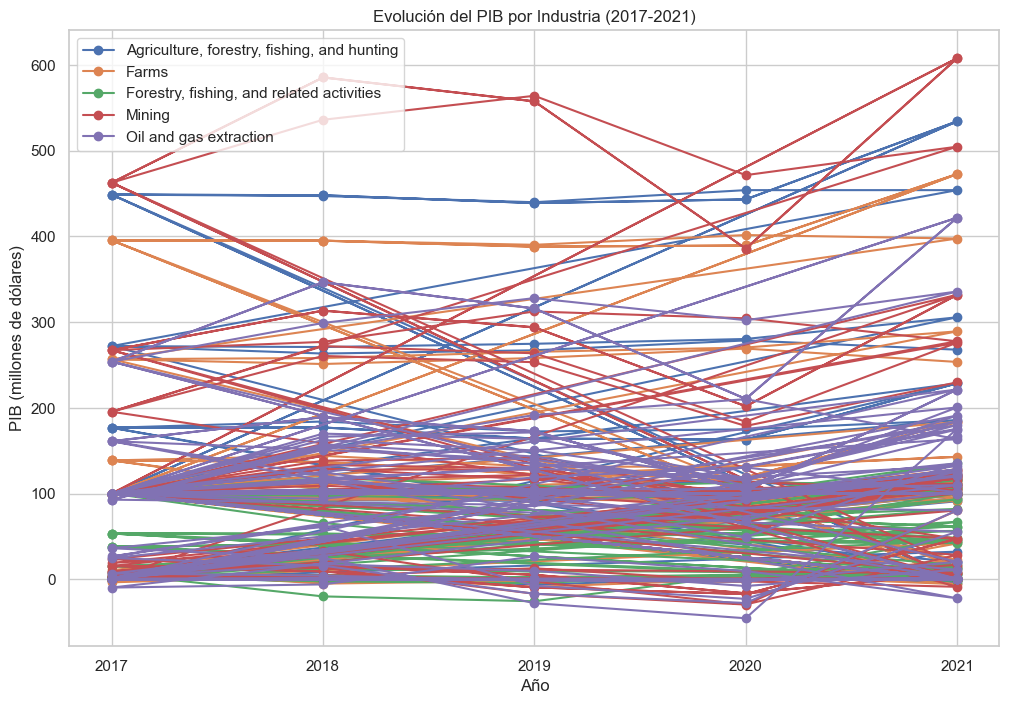

In [44]:
# Seleccionar las primeras 5 industrias usando el nombre correcto de la columna 'IndustrYDescription'
industries_to_plot = df['IndustrYDescription'].unique()[:5]

plt.figure(figsize=(12, 8))
for industry in industries_to_plot:
    subset = df[df['IndustrYDescription'] == industry]
    plt.plot(subset['Year'], subset['DataValue'], marker='o', label=industry)

plt.title('Evolución del PIB por Industria (2017-2021)')
plt.xlabel('Año')
plt.ylabel('PIB (millones de dólares)')
plt.legend()
plt.grid(True)
plt.show()


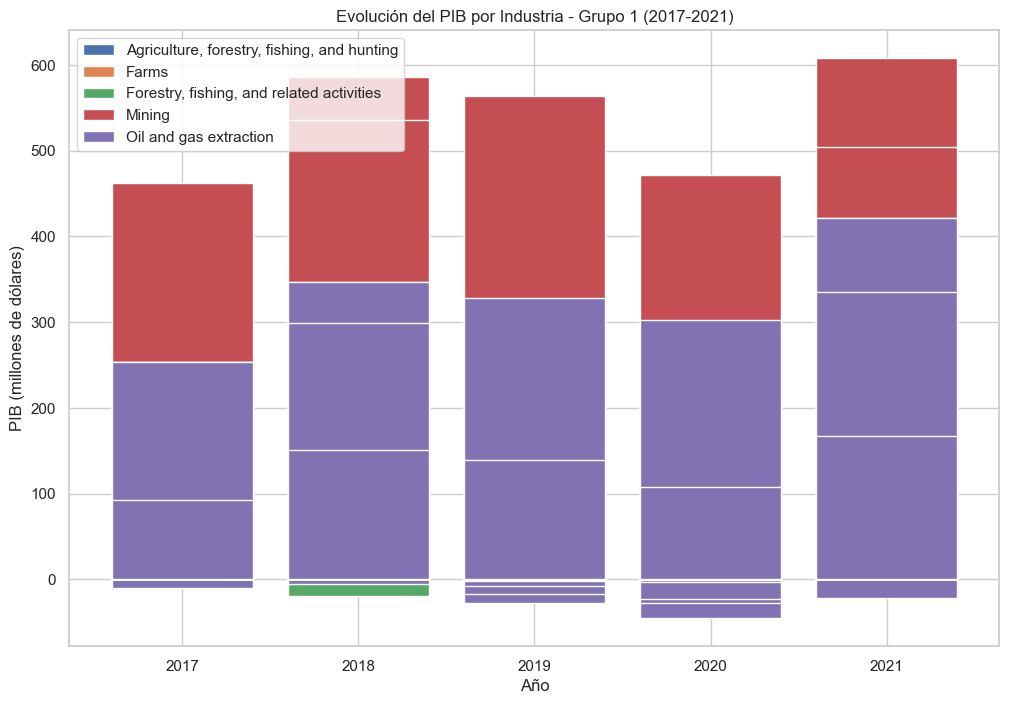

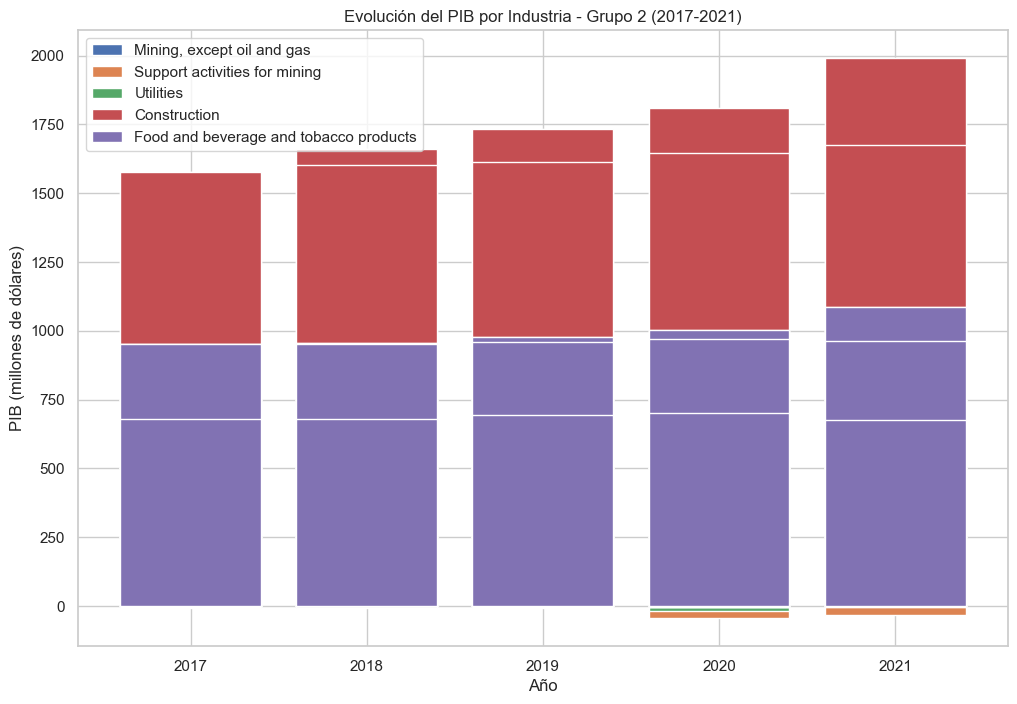

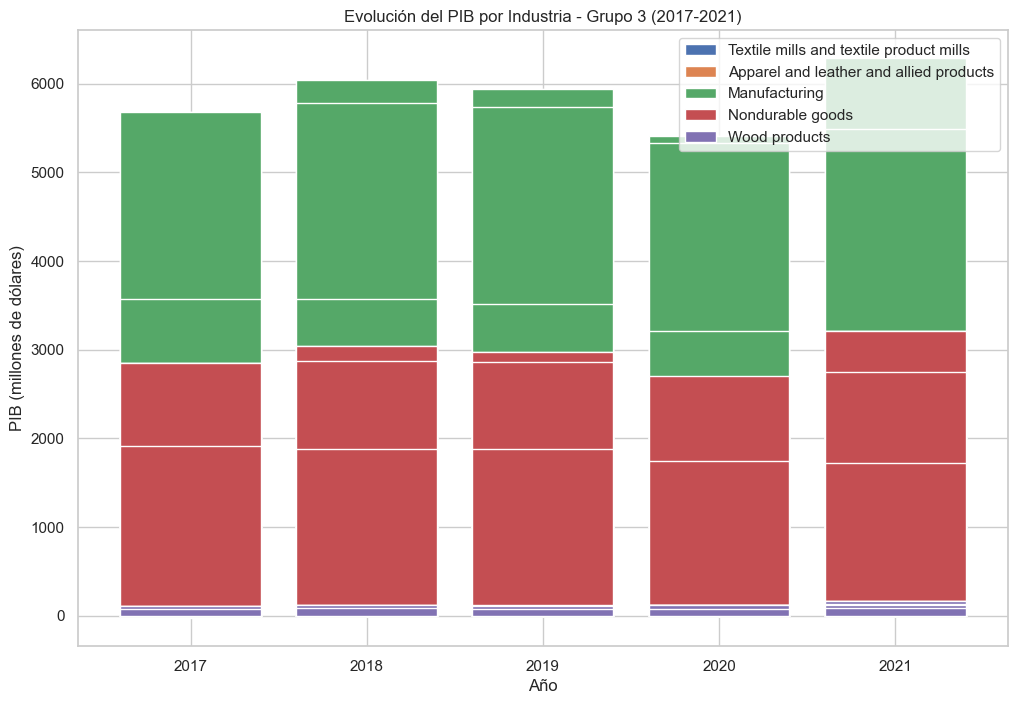

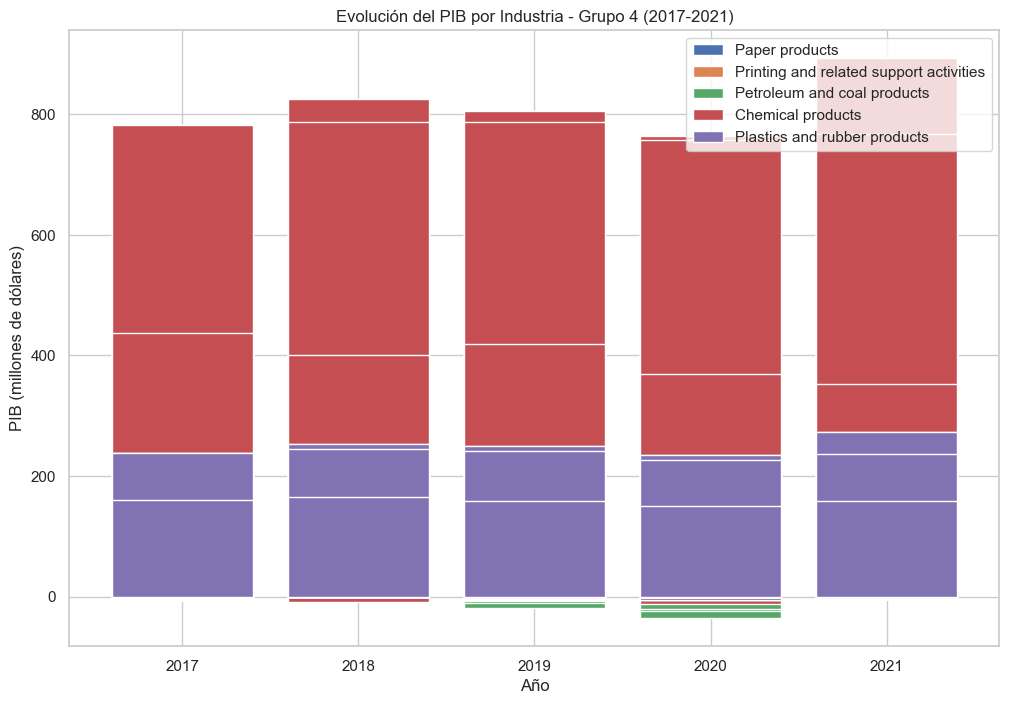

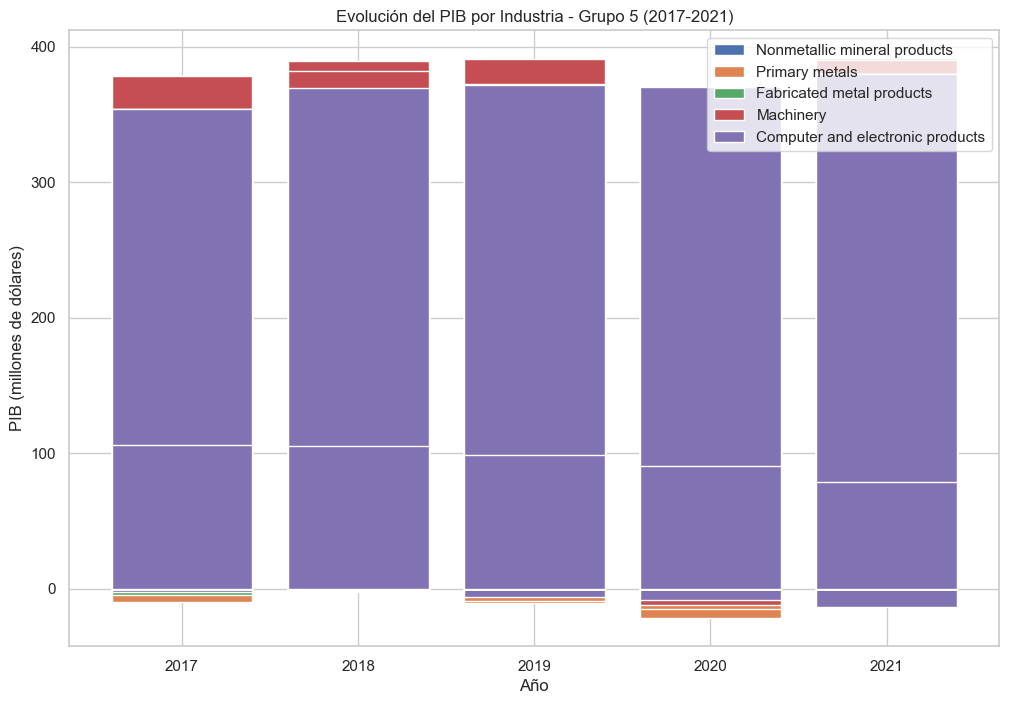

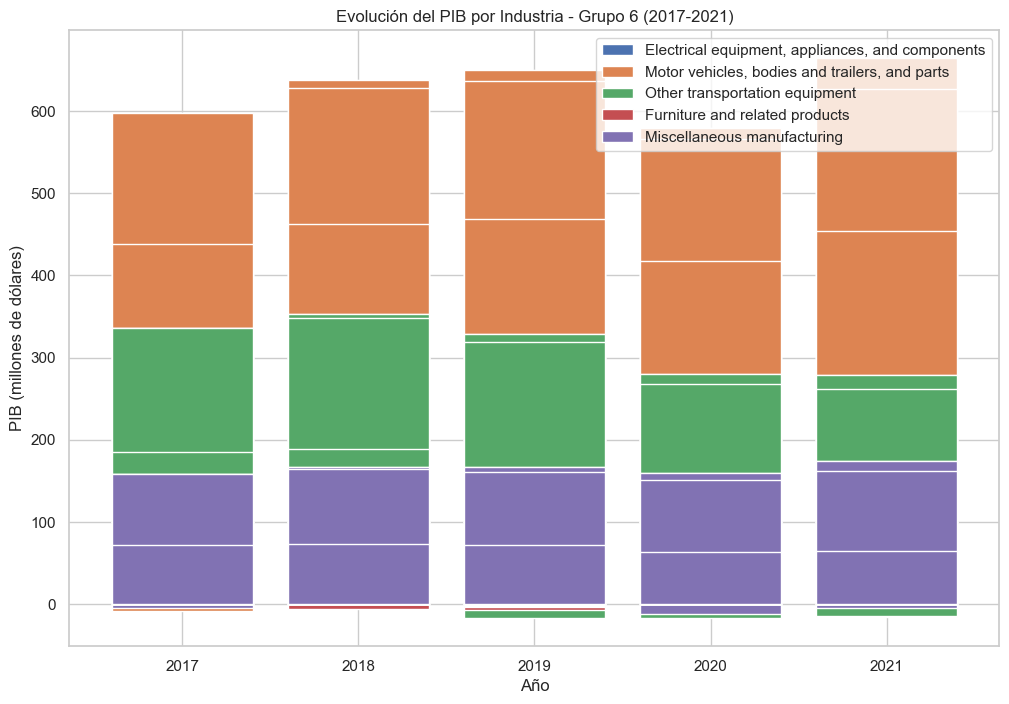

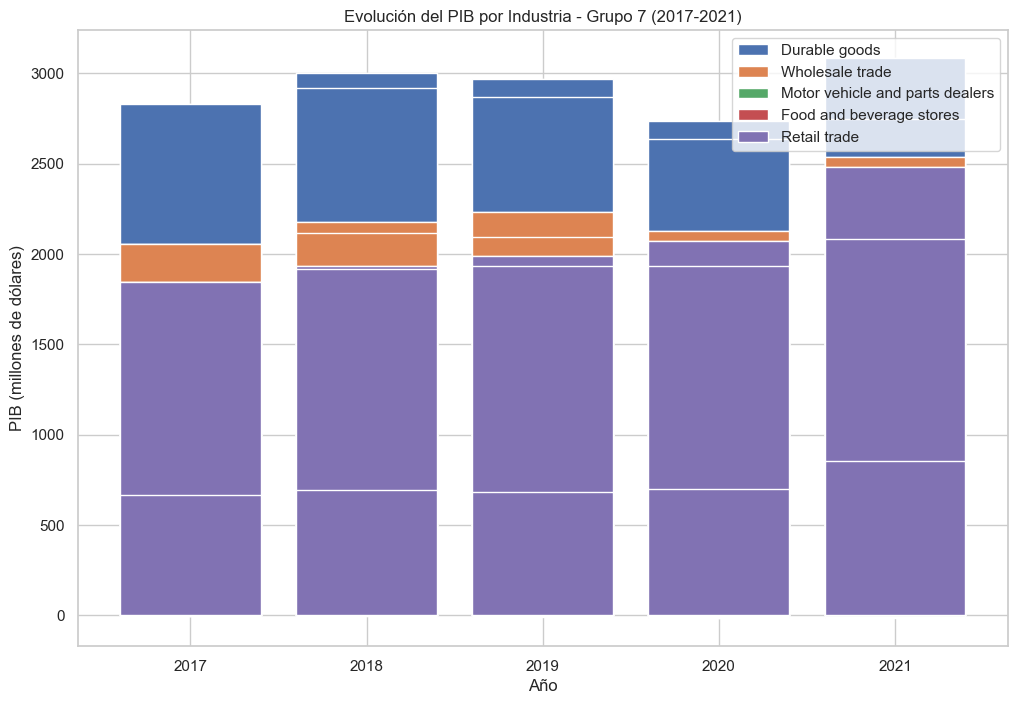

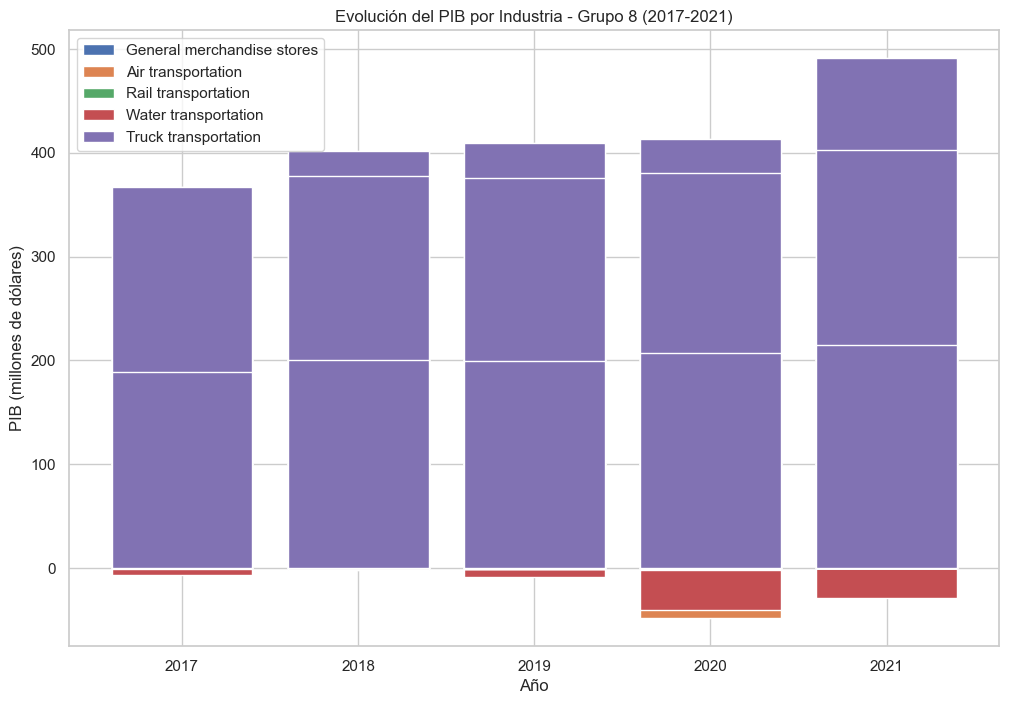

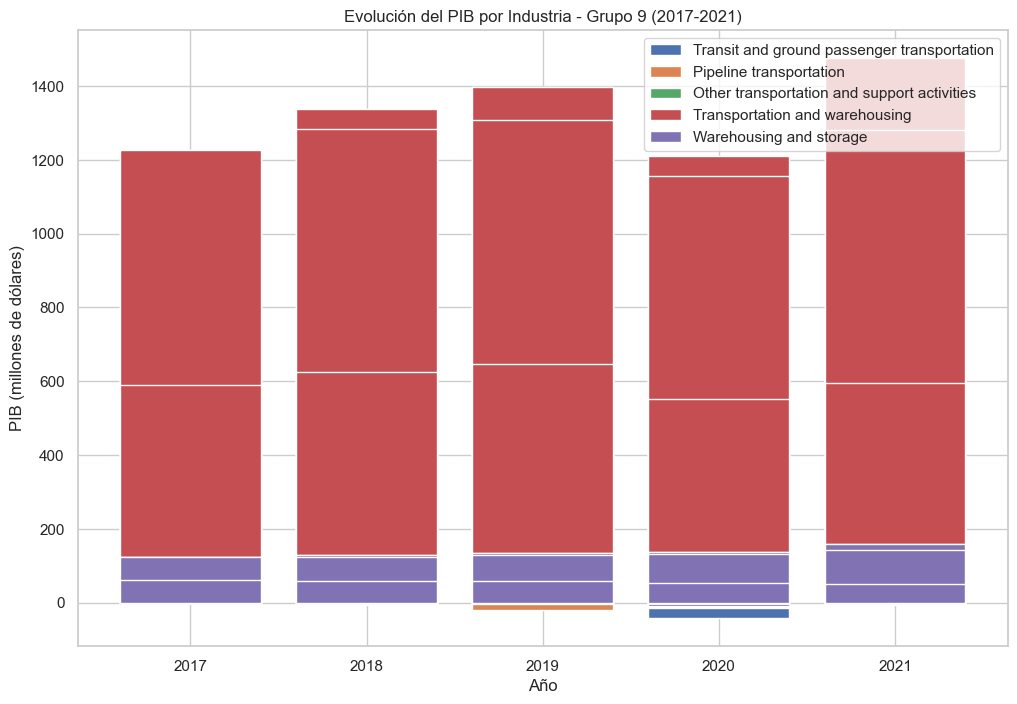

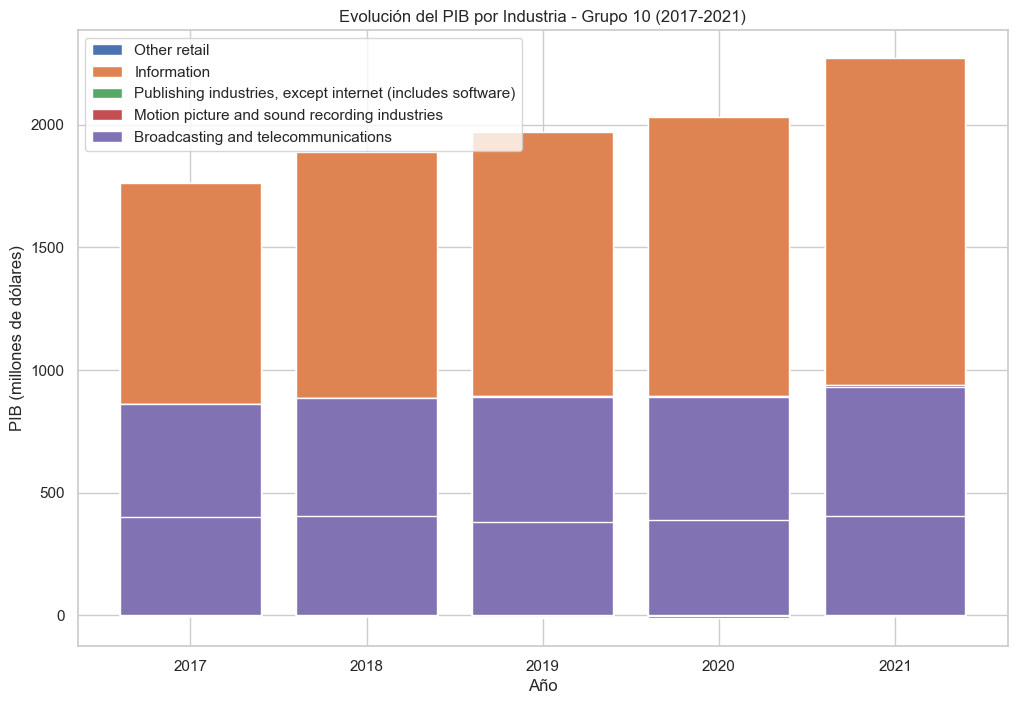

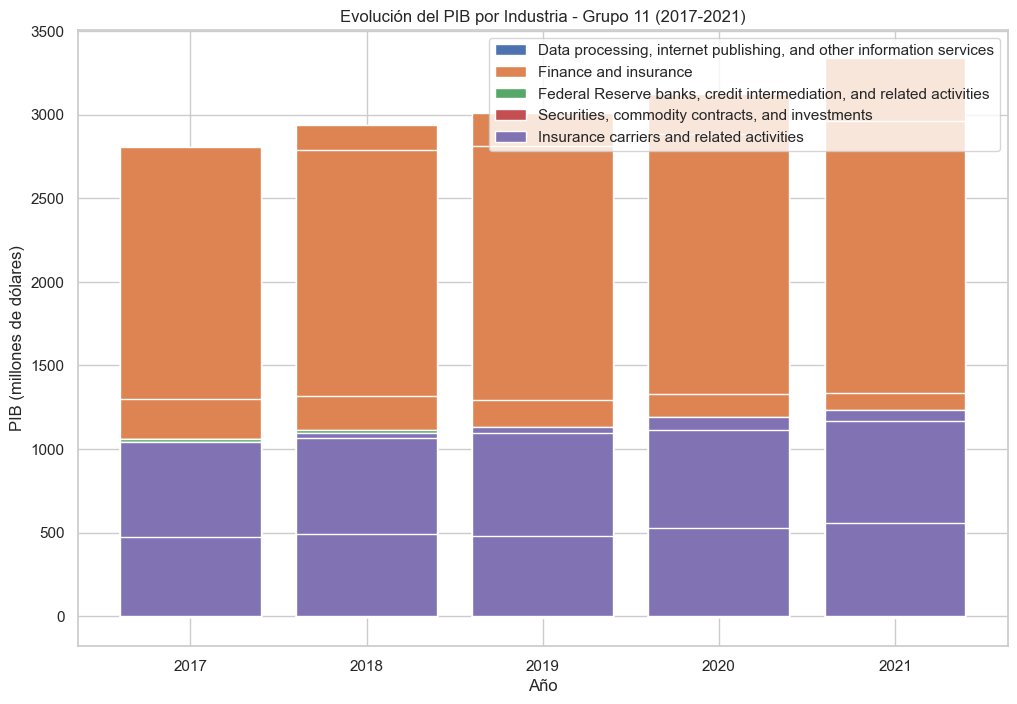

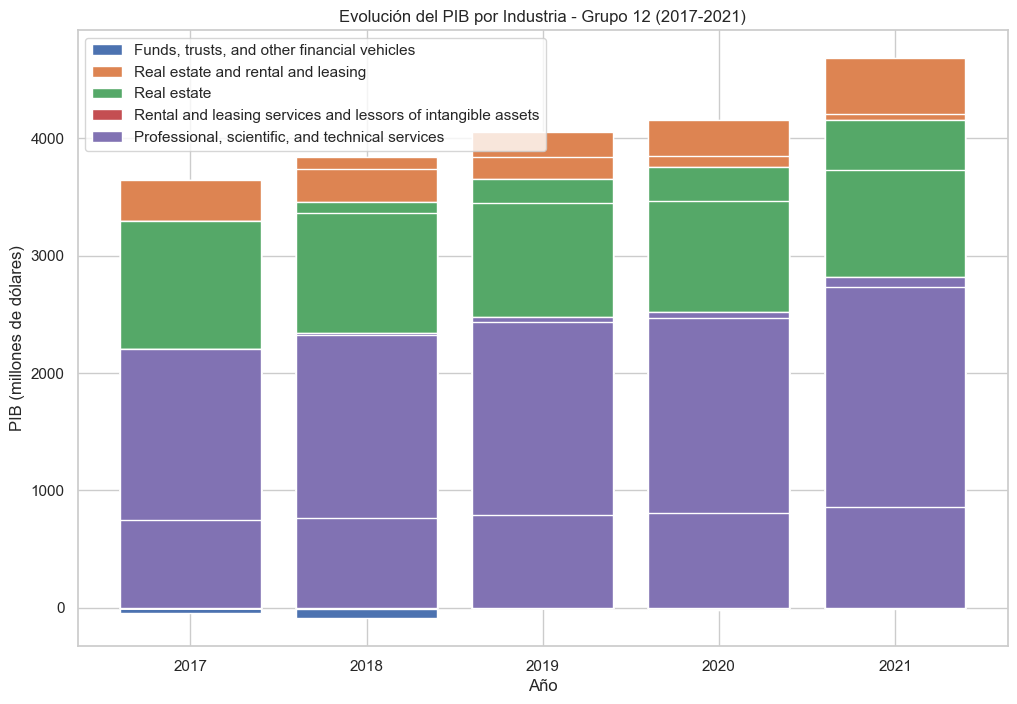

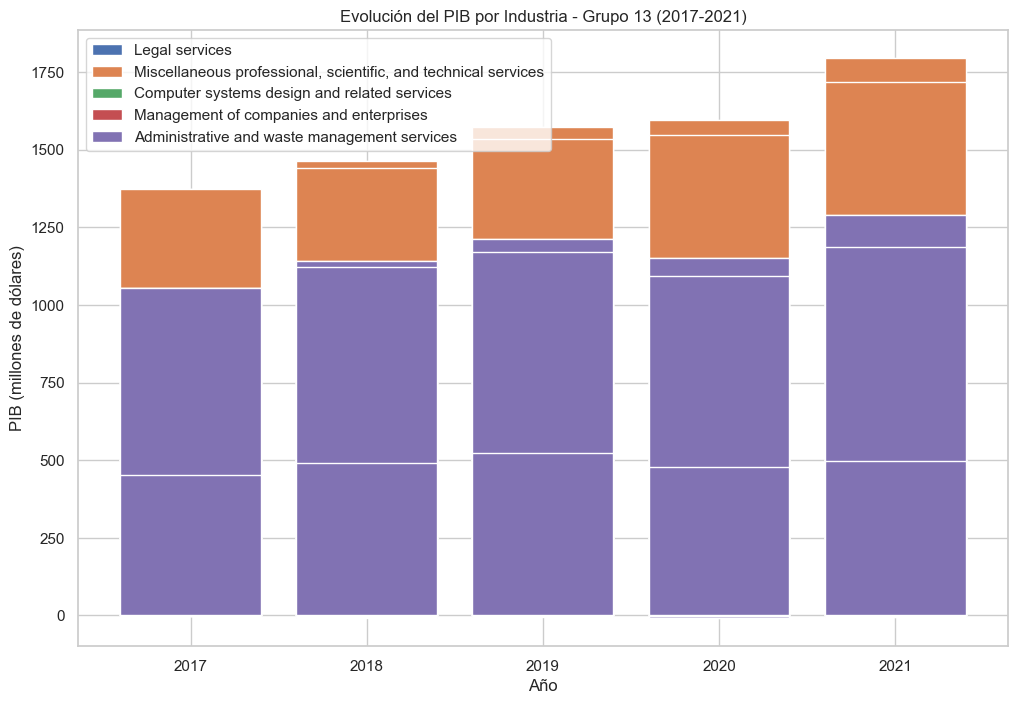

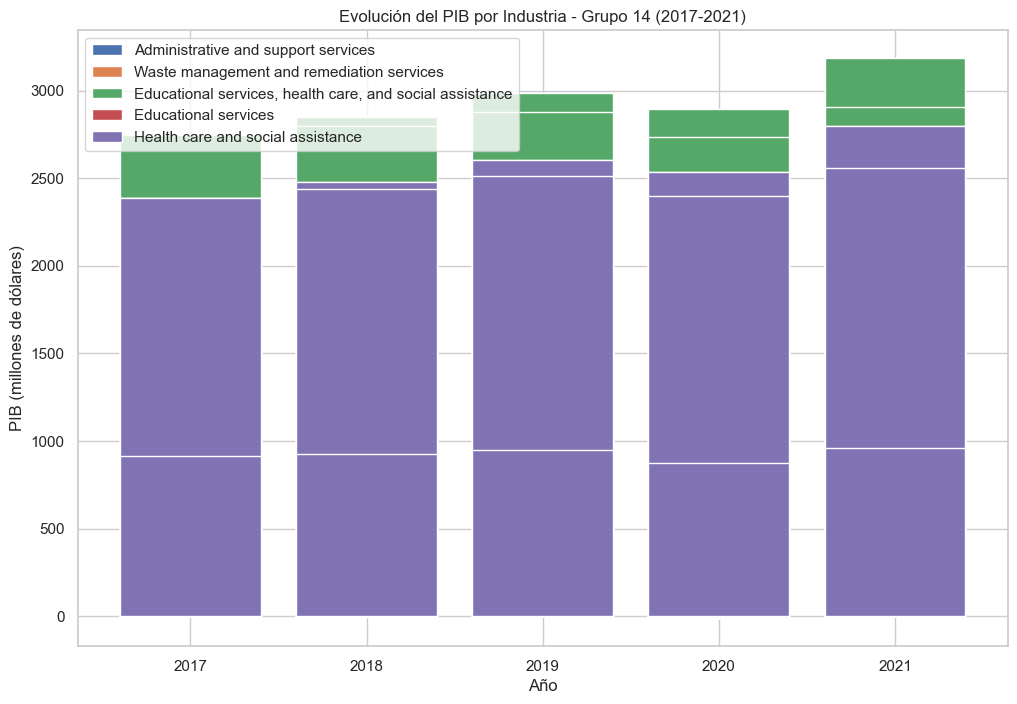

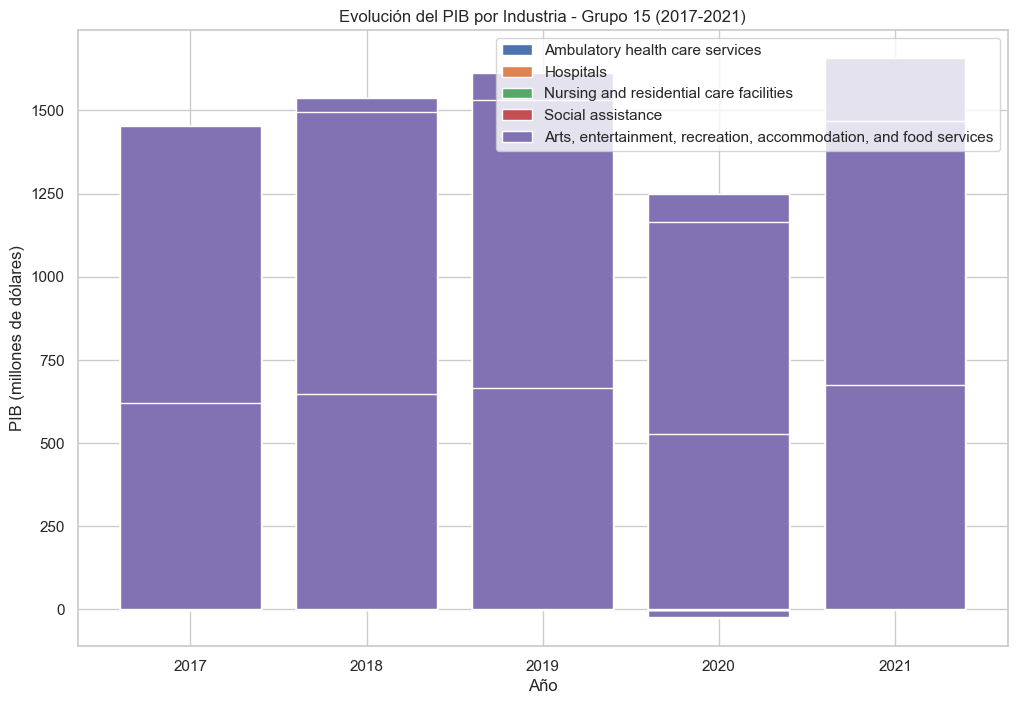

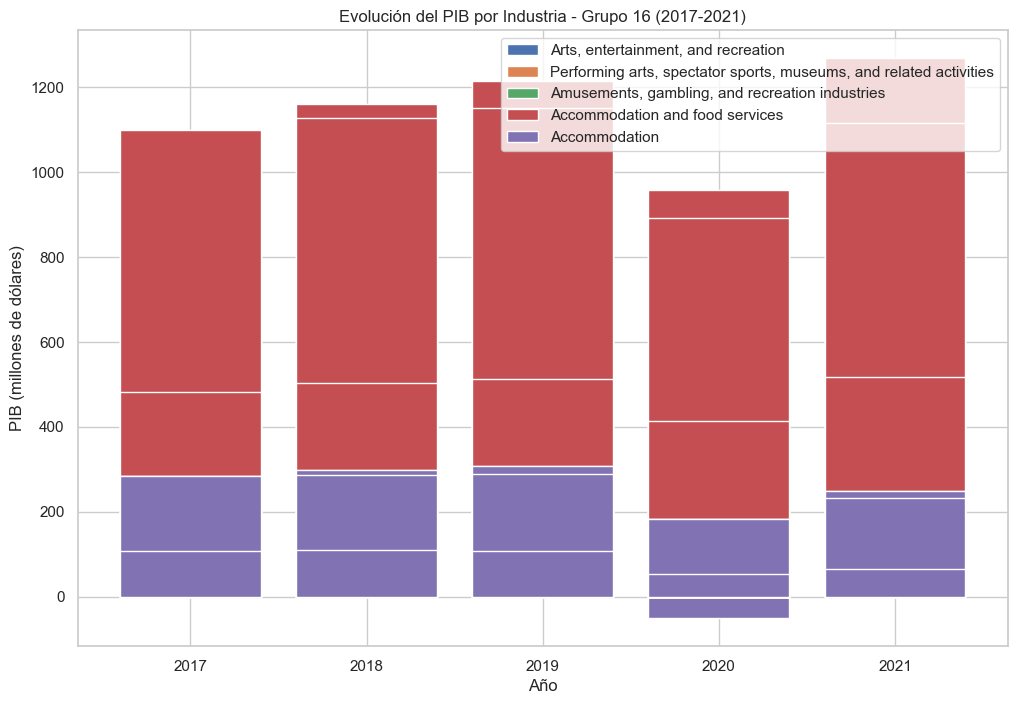

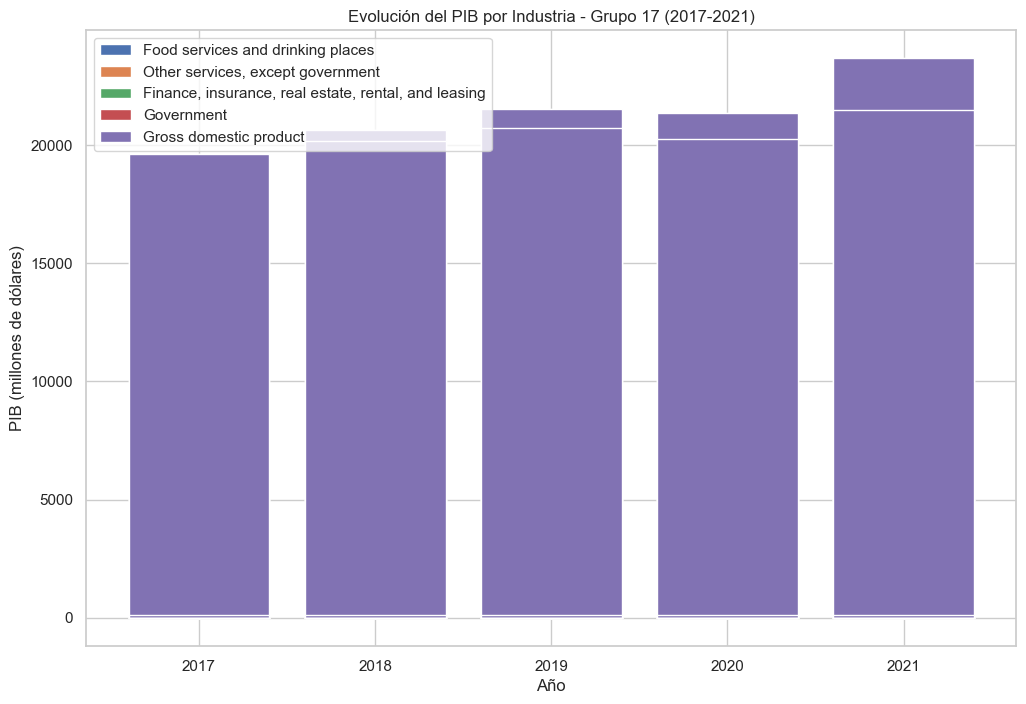

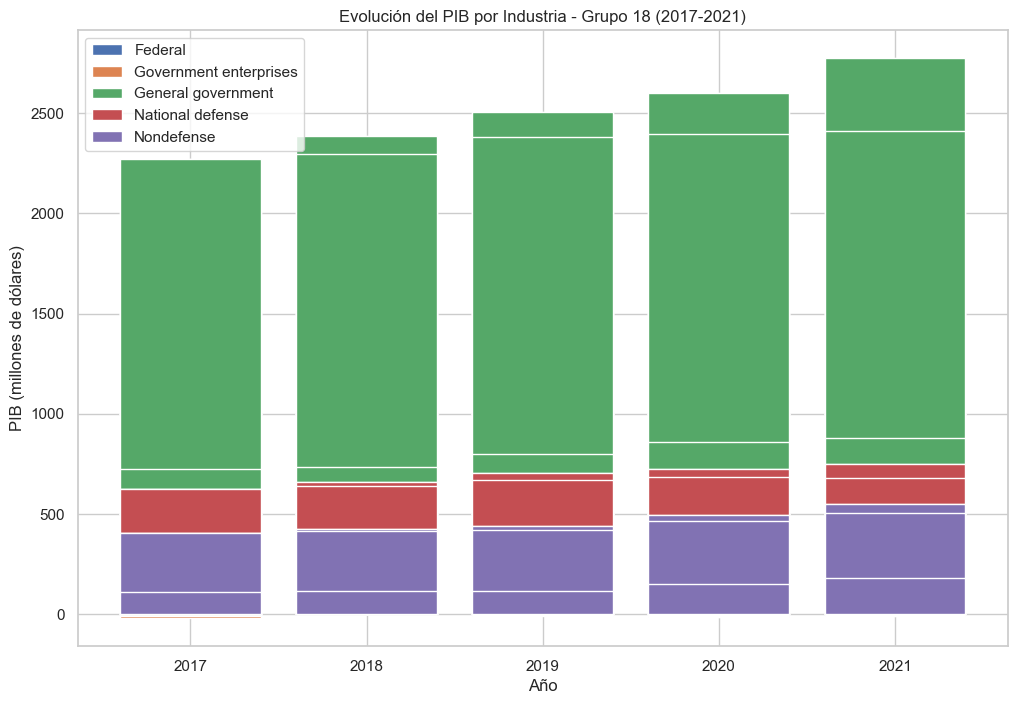

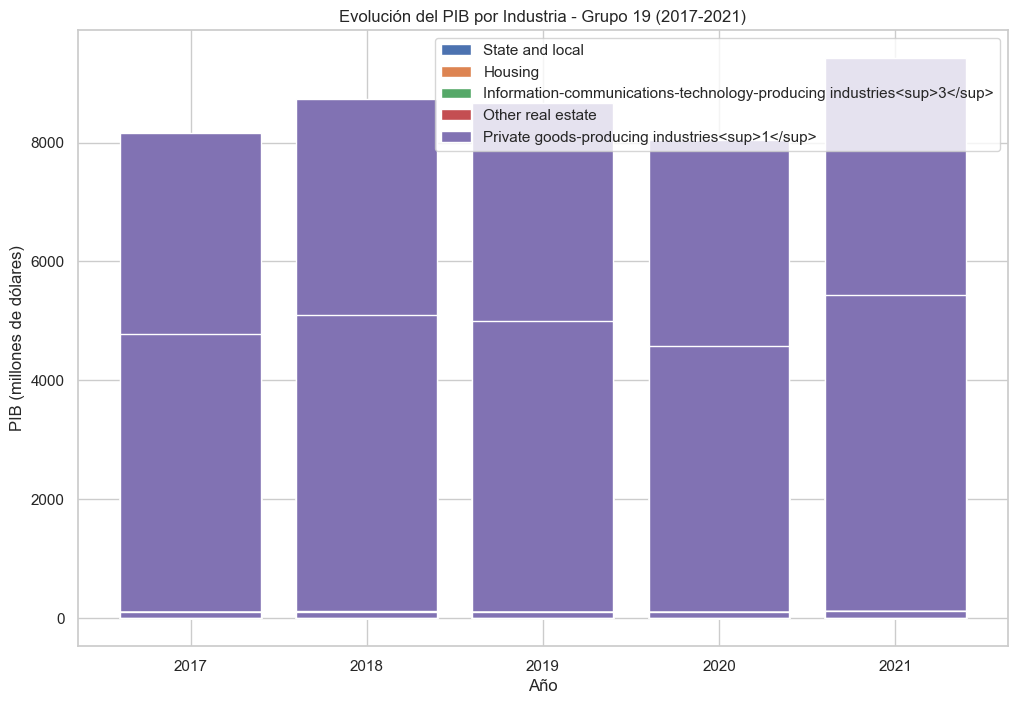

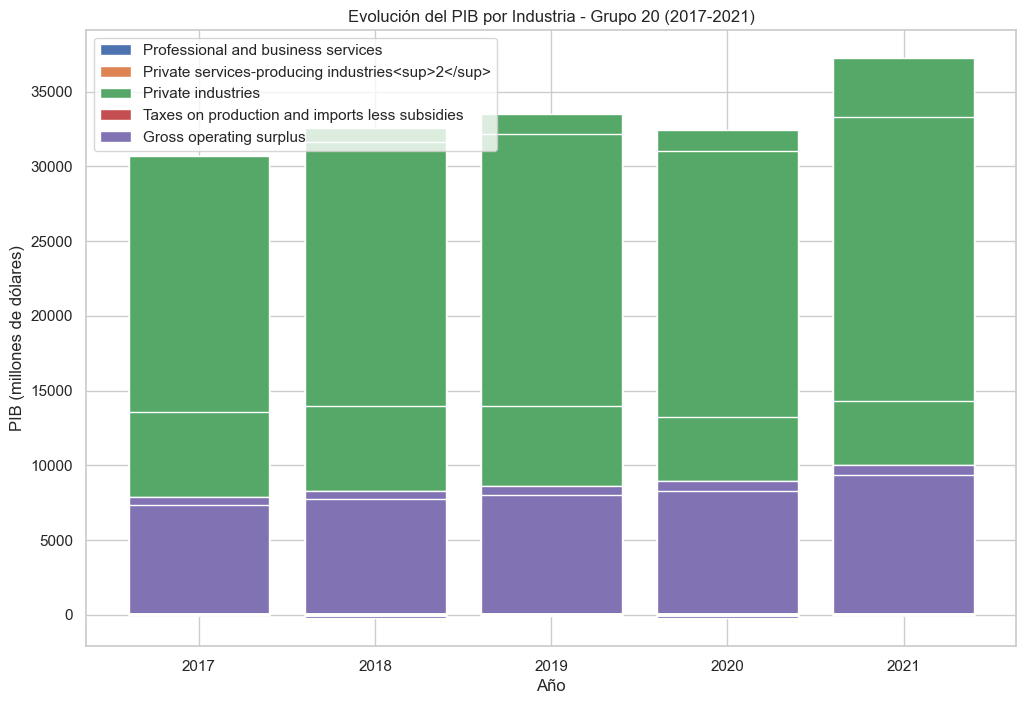

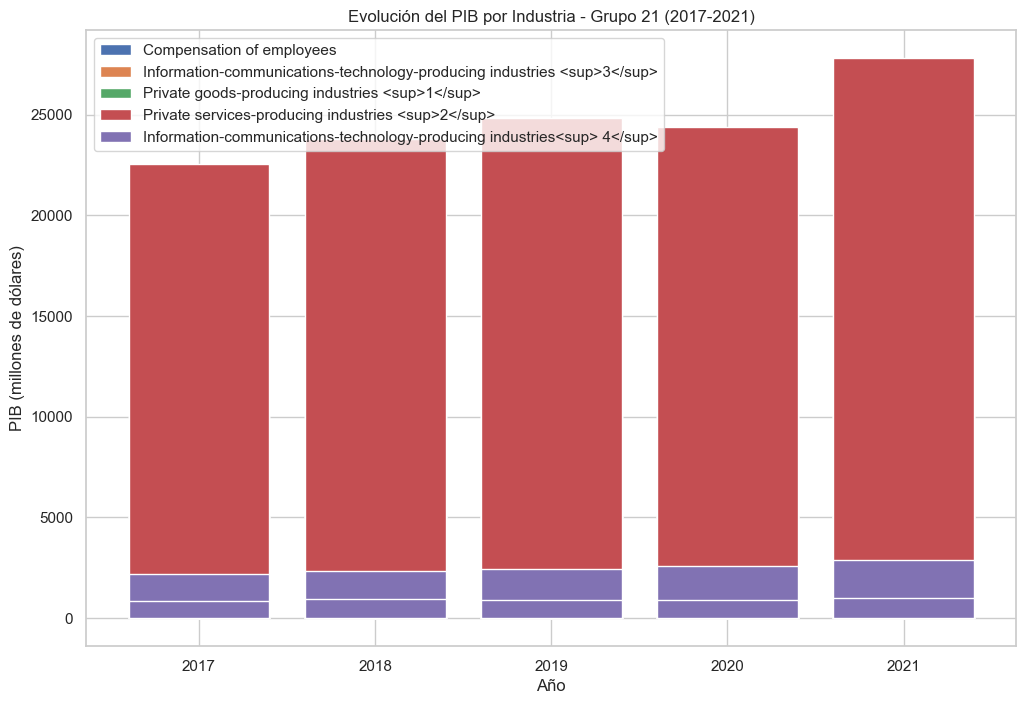

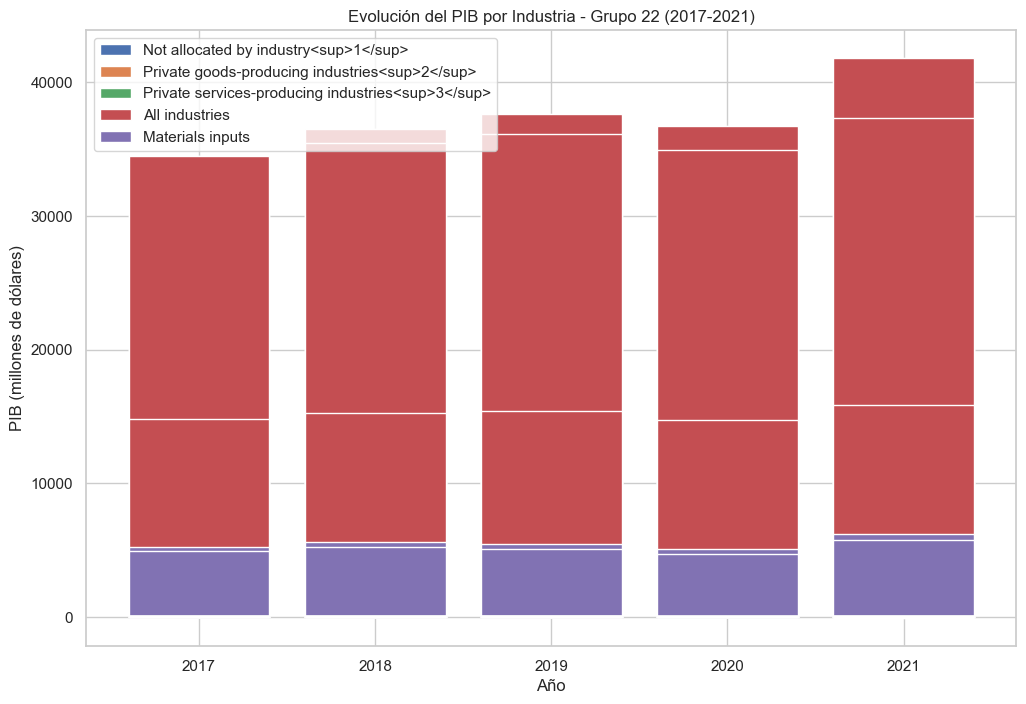

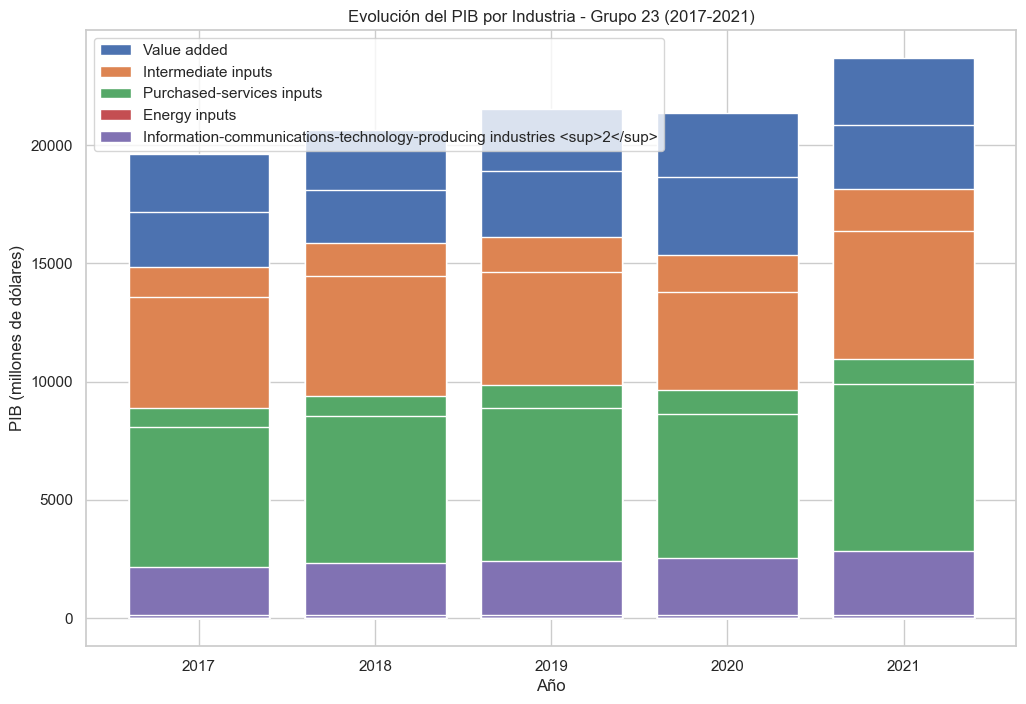

Grupo 24 está vacío. Saltando...


In [47]:
# Agrupar las industrias en grupos de 5 para suavizar el gráfico
industries = df['IndustrYDescription'].unique()
group_size = 5  # Tamaño del grupo de industrias a graficar
num_groups = len(industries) // group_size + 1  # Número de grupos

# Graficar cada grupo de industrias en formato de barras
for i in range(num_groups):
    group_industries = industries[i * group_size: (i + 1) * group_size]
    
    # Filtrar solo las filas con datos de las industrias en el grupo
    subset = df[df['IndustrYDescription'].isin(group_industries)]
    
    if subset.empty:
        print(f"Grupo {i + 1} está vacío. Saltando...")
        continue  # Si el subset está vacío, no hacer nada

    plt.figure(figsize=(12, 8))
    
    # Graficar las barras para cada industria
    for industry in group_industries:
        industry_data = subset[subset['IndustrYDescription'] == industry]
        
        # Verificar si hay datos para la industria actual
        if not industry_data.empty:
            plt.bar(industry_data['Year'], industry_data['DataValue'], label=industry)

    plt.title(f'Evolución del PIB por Industria - Grupo {i+1} (2017-2021)')
    plt.xlabel('Año')
    plt.ylabel('PIB (millones de dólares)')
    plt.legend()
    plt.grid(True)
    plt.show()


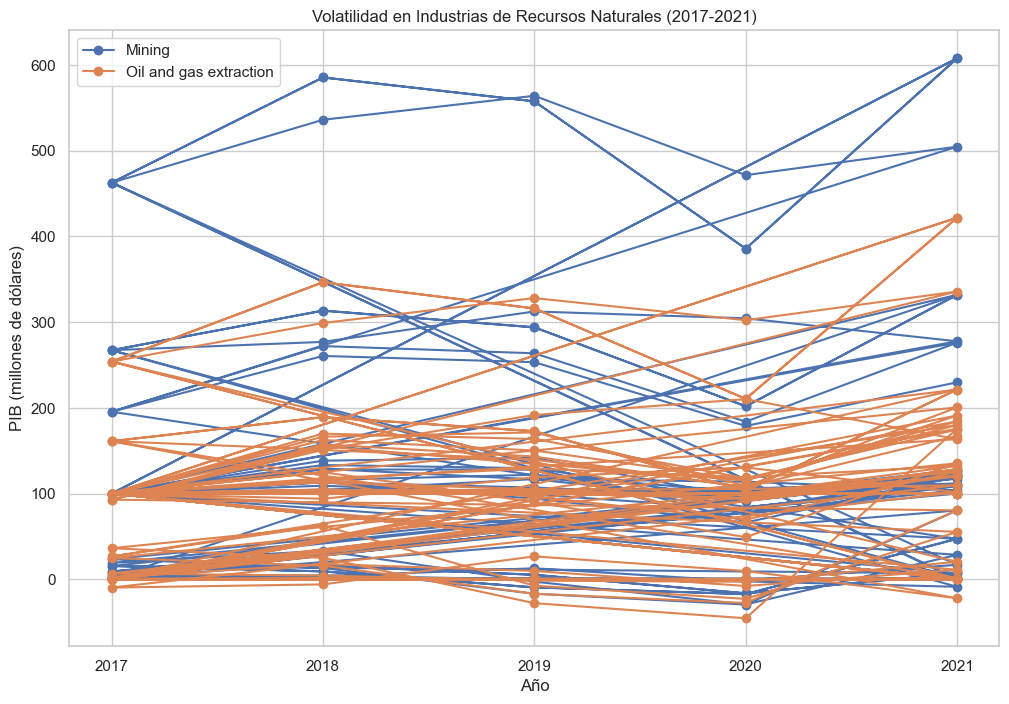

In [48]:
# Industrias relacionadas con recursos naturales (minería, petróleo y gas)
resource_industries = ['Mining', 'Oil and gas extraction']

plt.figure(figsize=(12, 8))
for industry in resource_industries:
    industry_data = df[df['IndustrYDescription'] == industry]
    plt.plot(industry_data['Year'], industry_data['DataValue'], marker='o', label=industry)

plt.title('Volatilidad en Industrias de Recursos Naturales (2017-2021)')
plt.xlabel('Año')
plt.ylabel('PIB (millones de dólares)')
plt.legend()
plt.grid(True)
plt.show()


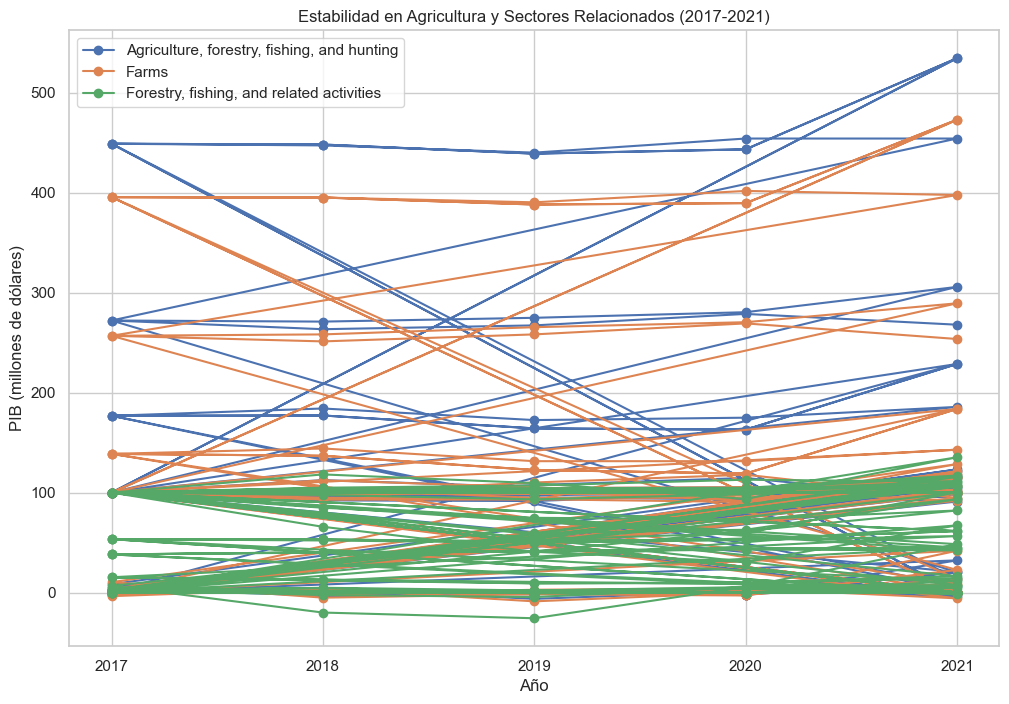

In [49]:
# Industrias estables: Agricultura, silvicultura, pesca
stable_industries = ['Agriculture, forestry, fishing, and hunting', 'Farms', 'Forestry, fishing, and related activities']

plt.figure(figsize=(12, 8))
for industry in stable_industries:
    industry_data = df[df['IndustrYDescription'] == industry]
    plt.plot(industry_data['Year'], industry_data['DataValue'], marker='o', label=industry)

plt.title('Estabilidad en Agricultura y Sectores Relacionados (2017-2021)')
plt.xlabel('Año')
plt.ylabel('PIB (millones de dólares)')
plt.legend()
plt.grid(True)
plt.show()
